# Лабораторная работа номер 3.

Загружаем необходимые библиотеки, а также датасет.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Предварительная обработка данных

Осуществим выбор признаков и целевой переменной, заполнение пропущенных значений и преобразование категориальных признаков:

In [42]:
features = ['Sex', 'Age', 'Fare', 'Pclass']  # Изменено на 'Pclass' как ключевой атрибут
target = 'Survived'  # Изменено на 'Survived' как целевой атрибут
data = data[features + [target]].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

# Разделение датасета на обучающую и тествую выборки

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

 # Классификация методом k ближайших соседей и оценка качества классификации (кроме ROC Curve)

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
print("Метрики для модели k ближайших соседей:")
print(f"Accuracy (kNN): {knn_accuracy:.2f}")
print("Точность (Precision):", knn_precision)
print("Полнота (Recall):", knn_recall)
print("F-мера (F-measure):", knn_f1)

Метрики для модели k ближайших соседей:
Accuracy (kNN): 0.66
Точность (Precision): 0.6495731661955066
Полнота (Recall): 0.6573426573426573
F-мера (F-measure): 0.6507981911451591


В целом, эти метрики говорят о том, что модель k ближайших соседей не смогла достичь высокой точности, полноты и F-меры. Это может указывать на то, что модель может неправильно классифицировать некоторые случаи, особенно если в данных есть много ложных положительных и ложных отрицательных предсказаний



#  Классификация методом дерево решений и оценка качества классификации (кроме ROC Curve)


In [45]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
print("\nМетрики для модели дерева решений:")
print(f"Accuracy (Decision Tree): {dt_accuracy:.2f}")
print("Точность (Precision):", dt_precision)
print("Полнота (Recall):", dt_recall)
print("F-мера (F-measure):", dt_f1)


Метрики для модели дерева решений:
Accuracy (Decision Tree): 0.71
Точность (Precision): 0.7124125874125874
Полнота (Recall): 0.7132867132867133
F-мера (F-measure): 0.7128143928143927


В свою очередь, эти метрики говорят о том, что модель дерева решений достигла удовлетворительной точности, полноты и F-меры. Это может указывать на то, что модель способна правильно классифицировать большую часть случаев, но есть некоторые случаи, где она может быть неточной


#  Построение ROC Curve для k ближайших соседей

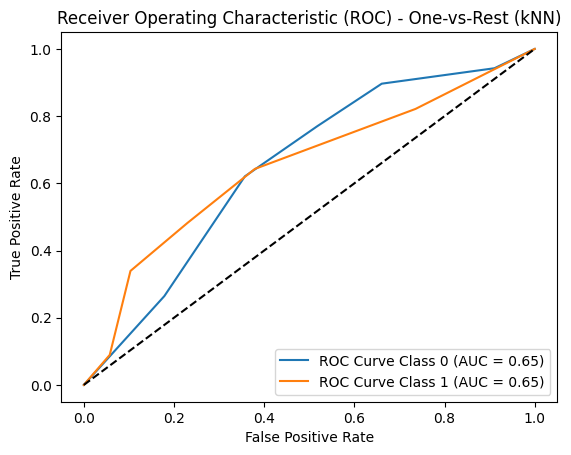

In [46]:
# Вычисление вероятностей принадлежности к каждому классу (One-vs-Rest)
knn_probabilities = knn.predict_proba(X_test)

# Вычисление ROC-кривой и AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for class_index in range(len(knn.classes_)):
    fpr[class_index], tpr[class_index], _ = roc_curve(y_test, knn_probabilities[:, class_index], pos_label=class_index)
    roc_auc[class_index] = auc(fpr[class_index], tpr[class_index])

# Построение ROC-кривых для каждого класса
plt.figure()
for class_index in range(len(knn.classes_)):
    plt.plot(fpr[class_index], tpr[class_index], label='ROC Curve Class %s (AUC = %0.2f)' % (class_index, roc_auc[class_index]))

plt.plot([0, 1], [0, 1], 'k--')  # Диагональная линия случайной классификации
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - One-vs-Rest (kNN)')
plt.legend(loc='lower right')
plt.show()


**Хороший результат, когда значение AUC -> 1 или хотя бы больше 0,5 (случайное бинарное предсказание).** 

В нашем случае, ROC Curve говорит о хорошем качестве пресказания как для k ближайших соседей, так и для дерева решений.

#  Построение ROC Curve для дерева решений

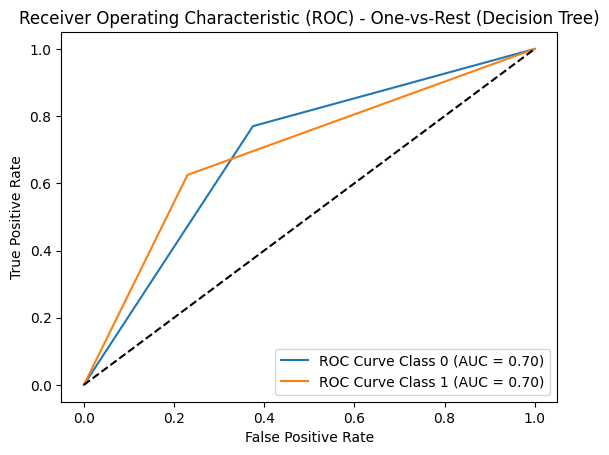

In [47]:
# Вычисление вероятностей принадлежности к каждому классу (One-vs-Rest)
dt_probabilities = dt.predict_proba(X_test)

# Вычисление ROC-кривой и AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for class_index in range(len(knn.classes_)):
    fpr[class_index], tpr[class_index], _ = roc_curve(y_test, dt_probabilities[:, class_index], pos_label=class_index)
    roc_auc[class_index] = auc(fpr[class_index], tpr[class_index])

# Построение ROC-кривых для каждого класса
plt.figure()
for class_index in range(len(knn.classes_)):
    plt.plot(fpr[class_index], tpr[class_index], label='ROC Curve Class %s (AUC = %0.2f)' % (class_index, roc_auc[class_index]))

plt.plot([0, 1], [0, 1], 'k--')  # Диагональная линия случайной классификации
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - One-vs-Rest (Decision Tree)')
plt.legend(loc='lower right')
plt.show()